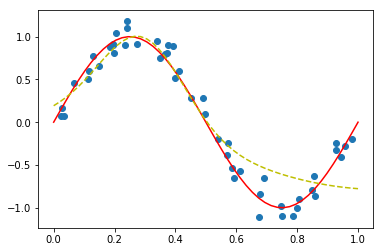

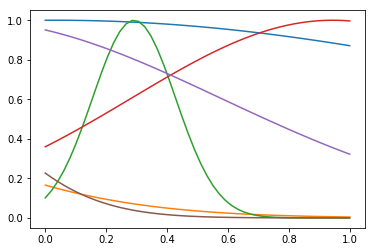

In [1]:
%matplotlib inline
import numpy as np
import tensorflow as tf
import math as m

M = 6
BATCH_SIZE = 40
num_iterations = 100

class Data:
	def __init__(self):
		N = 50
		sigma_noise = 0.1

		self.index = np.arange(N)
		self.x = np.random.uniform(size = (N,1))
		self.noise = np.random.normal(scale = sigma_noise, size = (N,1))
		self.y = np.sin(2*m.pi*self.x) + self.noise

	def get_data(self):
		return self.x, self.y

	def get_batch(self):
		choices = np.random.choice(self.index, size = BATCH_SIZE)
		return self.x[choices].flatten(), self.y[choices].flatten()

def f(x):
	w = tf.get_variable('w', [1, M], tf.float32,
						tf.random_normal_initializer())
	b = tf.get_variable('b', [], tf.float32,
						tf.zeros_initializer())
	mu_vec = tf.get_variable('mu_vec', [M,1], tf.float32,
						tf.random_normal_initializer())
	sigma_vec = tf.get_variable('sigma_vec', [M,1], tf.float32,
						tf.random_normal_initializer())
	x_vec = np.ones(shape = [M,1])*x
	phi_vec = tf.exp(-tf.pow((x_vec-mu_vec)/sigma_vec,2))
	return tf.squeeze(tf.matmul(w, phi_vec) + b)
def phi(x, mu, sigma):
	return np.exp(-np.power((x-mu)/sigma,2))
def create_phi_vector(x_vector, mu_vector, sigma_vector):
	phi_vector = []
	for x_val in x_vector:
		x_val_vec = np.ones(shape = (M,1))*x_val
		phi_vec = phi(x_val_vec, mu_vector, sigma_vector)
		phi_vector.append(phi_vec)
	return(np.squeeze(np.array(phi_vector)))

x = tf.placeholder(tf.float32, [BATCH_SIZE])
y = tf.placeholder(tf.float32, [BATCH_SIZE])
y_hat = f(x)

loss = tf.reduce_mean(tf.pow(y_hat-y, 2))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.04).minimize(loss)
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
data = Data()

for _ in range(num_iterations):
	x_batch, y_batch = data.get_batch()
	loss_np, _ = sess.run([loss, optimizer], feed_dict={x: x_batch, y: y_batch})

parameters = []
for var in tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES):
	parameter = np.array(sess.run(var))
	parameters.append(np.array(parameter))
w_hat, b_hat, mu_vec_hat, sigma_vec_hat = parameters

x_np, y_np = data.get_data()
x_ = np.linspace(0, 1)
y_ = np.sin(2*m.pi*x_)

phi_vector = create_phi_vector(x_, mu_vec_hat, sigma_vec_hat)
y_hat_vector = (w_hat@phi_vector.transpose() + np.ones(shape=(1,50))*b_hat).flatten()

import matplotlib.pyplot as plt
#Figure 1
plt.figure()
plt.scatter(x_np, y_np)
plt.plot(x_, y_, c = 'r')
plt.plot(x_, y_hat_vector, c = 'y', linestyle = 'dashed')

#Figure 2
plt.figure()
for m in range(M):
	plt.plot(x_, phi(x_, mu_vec_hat[m],sigma_vec_hat[m]))
plt.show()